# Factorizations and other fun
Based on work by Andreas Noack

## Outline
 - Factorizations
 - Special matrix structures
 - Generic linear algebra

Before we get started, let's set up a linear system and use `LinearAlgebra` to bring in the factorizations and special matrix structures.

In [1]:
using LinearAlgebra
A = rand(3, 3)
x = fill(1, (3,))
b = A * x

3-element Vector{Float64}:
 0.9123825051962386
 1.320851245225239
 1.439090403215979

## Factorizations

#### LU factorizations
In Julia we can perform an LU factorization
```julia
A = PLU
``` 
where `P` is a permutation matrix, `L` is lower triangular unit of the LU di and `U` is upper triangular, using `lufact`.

Julia allows computing the LU factorization and defines a composite factorization type for storing it.

In [2]:
?lu

search: lu lu! lq



```
lu(A, pivot = RowMaximum(); check = true, allowsingular = false) -> F::LU
```

Compute the LU factorization of `A`.

When `check = true`, an error is thrown if the decomposition fails. When `check = false`, responsibility for checking the decomposition's validity (via [`issuccess`](@ref)) lies with the user.

By default, with `check = true`, an error is also thrown when the decomposition produces valid factors, but the upper-triangular factor `U` is rank-deficient. This may be changed by passing `allowsingular = true`.

In most cases, if `A` is a subtype `S` of `AbstractMatrix{T}` with an element type `T` supporting `+`, `-`, `*` and `/`, the return type is `LU{T,S{T}}`.

In general, LU factorization involves a permutation of the rows of the matrix (corresponding to the `F.p` output described below), known as "pivoting" (because it corresponds to choosing which row contains the "pivot", the diagonal entry of `F.U`). One of the following pivoting strategies can be selected via the optional `pivot` argument:

  * `RowMaximum()` (default): the standard pivoting strategy; the pivot corresponds to the element of maximum absolute value among the remaining, to be factorized rows. This pivoting strategy requires the element type to also support [`abs`](@ref) and [`<`](@ref). (This is generally the only numerically stable option for floating-point matrices.)
  * `RowNonZero()`: the pivot corresponds to the first non-zero element among the remaining, to be factorized rows.  (This corresponds to the typical choice in hand calculations, and is also useful for more general algebraic number types that support [`iszero`](@ref) but not `abs` or `<`.)
  * `NoPivot()`: pivoting turned off (will fail if a zero entry is encountered in a pivot position, even when `allowsingular = true`).

The individual components of the factorization `F` can be accessed via [`getproperty`](@ref):

| Component | Description                         |
|:--------- |:----------------------------------- |
| `F.L`     | `L` (lower triangular) part of `LU` |
| `F.U`     | `U` (upper triangular) part of `LU` |
| `F.p`     | (right) permutation `Vector`        |
| `F.P`     | (right) permutation `Matrix`        |

Iterating the factorization produces the components `F.L`, `F.U`, and `F.p`.

The relationship between `F` and `A` is

`F.L*F.U == A[F.p, :]`

`F` further supports the following functions:

| Supported function  | `LU` | `LU{T,Tridiagonal{T}}` |
|:------------------- |:---- |:---------------------- |
| [`/`](@ref)         | ✓    |                        |
| [`\`](@ref)         | ✓    | ✓                      |
| [`inv`](@ref)       | ✓    | ✓                      |
| [`det`](@ref)       | ✓    | ✓                      |
| [`logdet`](@ref)    | ✓    | ✓                      |
| [`logabsdet`](@ref) | ✓    | ✓                      |
| [`size`](@ref)      | ✓    | ✓                      |

!!! compat "Julia 1.11"
    The `allowsingular` keyword argument was added in Julia 1.11.


# Examples

```jldoctest
julia> A = [4 3; 6 3]
2×2 Matrix{Int64}:
 4  3
 6  3

julia> F = lu(A)
LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
2×2 Matrix{Float64}:
 1.0       0.0
 0.666667  1.0
U factor:
2×2 Matrix{Float64}:
 6.0  3.0
 0.0  1.0

julia> F.L * F.U == A[F.p, :]
true

julia> l, u, p = lu(A); # destructuring via iteration

julia> l == F.L && u == F.U && p == F.p
true

julia> lu([1 2; 1 2], allowsingular = true)
LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
2×2 Matrix{Float64}:
 1.0  0.0
 1.0  1.0
U factor (rank-deficient):
2×2 Matrix{Float64}:
 1.0  2.0
 0.0  0.0
```


In [3]:
l,u,p = lu(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0       0.0       0.0
 0.538505  1.0       0.0
 0.882527  0.167746  1.0
U factor:
3×3 Matrix{Float64}:
 0.62762  0.210621  0.0741421
 0.0      0.321076  0.508453
 0.0      0.0       0.494738

In [4]:
l

3×3 Matrix{Float64}:
 1.0       0.0       0.0
 0.538505  1.0       0.0
 0.882527  0.167746  1.0

In [5]:
typeof(l)

Matrix{Float64} (alias for Array{Float64, 2})

In [6]:
u

3×3 Matrix{Float64}:
 0.62762  0.210621  0.0741421
 0.0      0.321076  0.508453
 0.0      0.0       0.494738

In [7]:
typeof(u)

Matrix{Float64} (alias for Array{Float64, 2})

In [8]:
p

3-element Vector{Int64}:
 1
 2
 3

In [9]:
typeof(p)

Vector{Int64} (alias for Array{Int64, 1})

The different parts of the factorization can be extracted by accessing their special properties

In [9]:
Alu=lu(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0        0.0       0.0
 0.28744    1.0       0.0
 0.634834  -0.793486  1.0
U factor:
3×3 Matrix{Float64}:
 0.299093  0.412198  0.923493
 0.0       0.311948  0.560666
 0.0       0.0       0.450416

In [10]:
Alu.P

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [11]:
p

3-element Vector{Int64}:
 1
 2
 3

In [12]:
Alu.L

3×3 Matrix{Float64}:
 1.0        0.0       0.0
 0.28744    1.0       0.0
 0.634834  -0.793486  1.0

In [13]:
Alu.U

3×3 Matrix{Float64}:
 0.299093  0.412198  0.923493
 0.0       0.311948  0.560666
 0.0       0.0       0.450416

Julia can dispatch methods on factorization objects.

For example, we can solve the linear system using either the original matrix or the factorization object.

In [14]:
A\b

3-element Vector{Float64}:
 0.9999999999999997
 0.9999999999999997
 1.0000000000000002

In [15]:
Alu\b

3-element Vector{Float64}:
 0.9999999999999997
 0.9999999999999997
 1.0000000000000002

Similarly, we can calculate the determinant of `A` using either `A` or the factorization object

In [ ]:
det(Alu)

In [ ]:
det(A) ≈ det(Alu)

#### Solving Systems using  LU Factorization
One reason people care about the  LU factorization is it allows the quick solution of systems of equations, here is another example

For example, consider the following system of two linear
equations:<br>
$$
2 x_1 + 3 x_2 = 4
$$

$$
5 x_1 + 4 x_2 = 3
$$

In [16]:
x1 =collect(-4:0.025:2);
 

 

In [17]:
x2_1 = (4 - 2 * x1)/3
x2_2 = (3 - 5 * x1)/4

LoadError: MethodError: no method matching -(::Int64, ::Vector{Float64})
For element-wise subtraction, use broadcasting with dot syntax: scalar .- array
The function `-` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  -(::Real, [91m::Complex{Bool}[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mcomplex.jl:324[24m[39m
[0m  -(::Number, [91m::UniformScaling[39m)
[0m[90m   @[39m [35mLinearAlgebra[39m [90m~/julia-1.11.1/share/julia/stdlib/v1.11/LinearAlgebra/src/[39m[90m[4muniformscaling.jl:147[24m[39m
[0m  -(::Number, [91m::Missing[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:124[24m[39m
[0m  ...


In [18]:
x2_1 =    (-(2 * x1)  .+ 4) ./ 3;
 

In [19]:
x2_2 =   (-(5 * x1)  .+ 3) ./ 4;

In [20]:
using Plots
gr()

Plots.GRBackend()

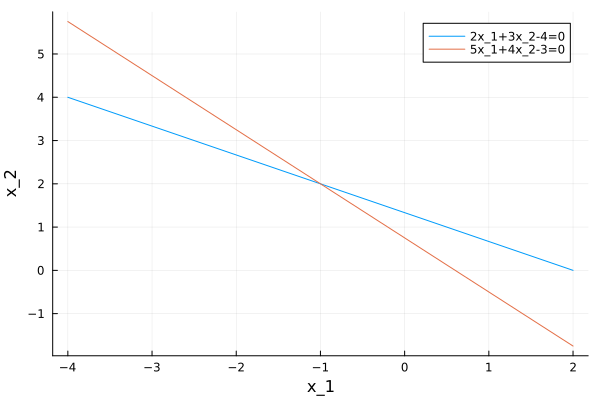

In [21]:
plot(x1, x2_1, label="2x_1+3x_2-4=0")
plot!(x1, x2_2, label="5x_1+4x_2-3=0")
xlabel!("x_1"  )
ylabel!("x_2"  )

In [22]:
A = [[2 3];[5 4]]

2×2 Matrix{Int64}:
 2  3
 5  4

In [23]:
b = [4, 3]

2-element Vector{Int64}:
 4
 3

Julia can dispatch methods on factorization objects.<br>

For example, we can solve the linear system using either the original matrix or the factorization object.

In [24]:
Alu=lu(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
2×2 Matrix{Float64}:
 1.0  0.0
 0.4  1.0
U factor:
2×2 Matrix{Float64}:
 5.0  4.0
 0.0  1.4

In [25]:
Alu\b

2-element Vector{Float64}:
 -1.0
  2.0

In [ ]:
A\b

#### QR factorizations

In Julia we can perform a QR factorization
```
A=QR
``` 

where `Q` is unitary/orthogonal and `R` is upper triangular, using `qrfact`. 

In [26]:
Aqr = qr(A)

LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}, Matrix{Float64}}
Q factor: 2×2 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}
R factor:
2×2 Matrix{Float64}:
 -5.38516  -4.82808
  0.0      -1.29987

Similarly to the LU factorization, the matrices `Q` and `R` can be extracted from the QR factorization object via

In [27]:
Aqr.Q

2×2 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}

In [28]:
Aqr.R

2×2 Matrix{Float64}:
 -5.38516  -4.82808
  0.0      -1.29987

#### Solving Systems using  QR Factorization
QR factorization  can help provide solution of systems of equations,

For example, consider the following system of two linear
equations:<br>
$$
2 x_1 + 3 x_2 = 4
$$

$$
5 x_1 + 4 x_2 = 3
$$

In [29]:
Aqr\b

2-element Vector{Float64}:
 -1.0
  2.0

#### Eigen decompositions

The results from eigendecompositions, singular value decompositions, Hessenberg factorizations, and Schur decompositions are all stored in `Factorization` types.

The eigendecomposition can be computed

In [30]:
Asym = A + A'
AsymEig = eigen(Asym)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -2.246211251235321
 14.246211251235321
vectors:
2×2 Matrix{Float64}:
 -0.788205  0.615412
  0.615412  0.788205

The values and the vectors can be extracted from the Eigen type by special indexing

In [31]:
AsymEig.values

2-element Vector{Float64}:
 -2.246211251235321
 14.246211251235321

In [32]:
AsymEig.vectors

2×2 Matrix{Float64}:
 -0.788205  0.615412
  0.615412  0.788205

Once again, when the factorization is stored in a type, we can dispatch on it and write specialized methods that exploit the properties of the factorization, e.g. that $A^{-1}=(V\Lambda V^{-1})^{-1}=V\Lambda^{-1}V^{-1}$.

In [33]:
inv(AsymEig)*Asym

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

## Special matrix structures
Matrix structure is very important in linear algebra. To see *how* important it is, let's work with a larger linear system

In [34]:
n = 1000
A = randn(n,n);

Julia can often infer special matrix structure

In [35]:
Asym = A + A'
issymmetric(Asym)

true

but sometimes floating point error might get in the way.

In [36]:
Asym_noisy = copy(Asym)
Asym_noisy[1,2] += 5eps()

-0.2566049076276248

In [37]:
issymmetric(Asym_noisy)

false

Luckily we can declare structure explicitly with, for example, `Diagonal`, `Triangular`, `Symmetric`, `Hermitian`, `Tridiagonal` and `SymTridiagonal`.

In [39]:
Symmetric(Asym_noisy)

1000×1000 Symmetric{Float64, Matrix{Float64}}:
  2.15687   -0.256605    1.35198    …  -1.01633     2.28777    0.61342
 -0.256605  -1.60735    -0.11834        0.107402   -1.03354    0.466429
  1.35198   -0.11834    -1.46922        2.89967    -1.4504    -0.047376
 -1.27299   -0.628889   -0.814328       0.0968889  -0.168622  -0.312387
 -0.537448   1.21862     2.49055       -1.60396    -0.231619   2.26459
  0.493872  -1.76221     2.0568     …   1.01897    -1.4317     0.554633
 -0.20858   -0.595879   -0.0637681     -1.31213     0.161528  -2.25862
  0.220901   2.88902    -1.66518       -1.78579    -0.389654  -1.39496
 -1.43092    0.724175   -2.8202         2.03826     2.22094    2.79509
 -0.191892   1.33504    -0.850187      -1.10786     0.952702  -0.434319
 -1.03416   -0.171669   -1.89767    …   1.15654    -0.227594  -1.30567
 -1.10289   -0.0746228   0.790505       0.745529   -0.126532  -0.884385
  0.698763   1.4036     -0.625463       0.41153     1.9014     1.63963
  ⋮                     

In [38]:
Asym_explicit = Symmetric(Asym_noisy);

Let's compare how long it takes Julia to compute the eigenvalues of `Asym`, `Asym_noisy`, and `Asym_explicit`

In [40]:
@time eigvals(Asym);

 22.852954 seconds (402.18 k allocations: 28.439 MiB, 0.28% gc time, 4.95% compilation time)


In [41]:
@time eigvals(Asym_noisy);

 45.026809 seconds (27 allocations: 7.928 MiB, 0.64% gc time)


In [42]:
@time eigvals(Asym_explicit);

 22.001928 seconds (237.53 k allocations: 20.257 MiB, 1.14% compilation time)


In this example, using `Symmetric()` on `Asym_noisy` made our calculations about `10x` more efficient :)

#### A big problem
Using the `Tridiagonal` and `SymTridiagonal` types to store tridiagonal matrices makes it possible to work with potentially very large tridiagonal problems. The following problem would not be possible to solve on a laptop if the matrix had to be stored as a (dense) `Matrix` type.

In [43]:
n = 1_000_000;
A = SymTridiagonal(randn(n), randn(n-1));
@time eigmax(A)

  1.097147 seconds (219.32 k allocations: 194.668 MiB, 6.29% gc time, 19.89% compilation time)


6.703695881258346

## Generic linear algebra
The usual way of adding support for numerical linear algebra is by wrapping BLAS and LAPACK subroutines. For matrices with elements of `Float32`, `Float64`, `Complex{Float32}` or `Complex{Float64}` this is also what Julia does.

However, Julia also supports generic linear algebra, allowing you to, for example, work with matrices and vectors of rational numbers.

#### Rational numbers
Julia has rational numbers built in. To construct a rational number, use double forward slashes:

In [44]:
1//2

1//2

#### Example: Rational linear system of equations
The following example shows how linear system of equations with rational elements can be solved without promoting to floating point element types. Overflow can easily become a problem when working with rational numbers so we use `BigInt`s.

In [45]:
Arational = Matrix{Rational{BigInt}}(rand(1:10, 3, 3))/10

3×3 Matrix{Rational{BigInt}}:
  1     3//5  3//5
 1//10   1    9//10
 2//5   3//5   1

In [46]:
x = fill(1, 3)
b = Arational*x

3-element Vector{Rational{BigInt}}:
 11//5
   2
   2

In [47]:
Arational\b

3-element Vector{Rational{BigInt}}:
 1
 1
 1

In [48]:
lu(Arational)

LU{Rational{BigInt}, Matrix{Rational{BigInt}}, Vector{Int64}}
L factor:
3×3 Matrix{Rational{BigInt}}:
  1       0     0
 1//10    1     0
 2//5   18//47  1
U factor:
3×3 Matrix{Rational{BigInt}}:
 1   3//5     3//5
 0  47//50   21//25
 0    0     103//235

### Exercises

#### 11.1
What are the eigenvalues of matrix A?

```
A =
[
 140   97   74  168  131
  97  106   89  131   36
  74   89  152  144   71
 168  131  144   54  142
 131   36   71  142   36
]
```
and assign it a variable `A_eigv`

In [10]:
A =
[
 140   97   74  168  131
  97  106   89  131   36
  74   89  152  144   71
 168  131  144   54  142
 131   36   71  142   36
]

5×5 Matrix{Int64}:
 140   97   74  168  131
  97  106   89  131   36
  74   89  152  144   71
 168  131  144   54  142
 131   36   71  142   36

In [54]:
@assert A_eigv ≈  [-128.49322764802145, -55.887784553056875, 42.7521672793189, 87.16111477514521, 542.4677301466143]

In [55]:
@assert A_eigv ==  [-128.49322764802145, -55.887784553056875, 42.7521672793189, 87.16111477514521, 542.4677301466143]

LoadError: AssertionError: A_eigv == [-128.49322764802145, -55.887784553056875, 42.7521672793189, 87.16111477514521, 542.4677301466143]

#### 11.2 
Create a `Diagonal` matrix from the eigenvalues of `A`. Assign it to variable `A_diag`

In [56]:
for i in names(LinearAlgebra)
    print(i," ")
end

/ AbstractTriangular Adjoint BLAS Bidiagonal BunchKaufman Cholesky CholeskyPivoted ColumnNorm Diagonal Eigen Factorization GeneralizedEigen GeneralizedSVD GeneralizedSchur Givens Hermitian Hessenberg I LAPACK LAPACKException LDLt LQ LU LinearAlgebra LowerTriangular NoPivot PosDefException QR QRPivoted RankDeficientException RowMaximum RowNonZero SVD Schur SingularException SymTridiagonal Symmetric Transpose Tridiagonal UniformScaling UnitLowerTriangular UnitUpperTriangular UpperHessenberg UpperTriangular ZeroPivotException \ adjoint adjoint! axpby! axpy! bunchkaufman bunchkaufman! checksquare cholesky cholesky! cond condskeel convert copy_adjoint! copy_transpose! copyto! copytrito! cross det diag diagind diagm dot eigen eigen! eigmax eigmin eigvals eigvals! eigvecs factorize givens hermitian hermitian_type hermitianpart hermitianpart! hessenberg hessenberg! inertia isbanded isdiag ishermitian isposdef isposdef! issuccess issymmetric istril istriu kron kron! ldiv! ldlt ldlt! lmul! logab

In [60]:
#?Diagonal

In [66]:
@assert A_diag ==  [-128.493    0.0      0.0      0.0       0.0;
    0.0    -55.8878   0.0      0.0       0.0;
    0.0      0.0     42.7522   0.0       0.0;
    0.0      0.0      0.0     87.1611    0.0;
    0.0 0.0      0.0      0.0     542.468]

LoadError: AssertionError: A_diag == [-128.493 0.0 0.0 0.0 0.0; 0.0 -55.8878 0.0 0.0 0.0; 0.0 0.0 42.7522 0.0 0.0; 0.0 0.0 0.0 87.1611 0.0; 0.0 0.0 0.0 0.0 542.468]

#### 11.3 
Create a `LowerTriangular` matrix from `A` and store it in `A_lowertri`

In [67]:
A

5×5 Matrix{Int64}:
 140   97   74  168  131
  97  106   89  131   36
  74   89  152  144   71
 168  131  144   54  142
 131   36   71  142   36

In [68]:
@isdefined LowerTriangular

true

In [71]:
@assert A_lowertri ==  [140    0    0    0   0;
  97  106    0    0   0;
  74   89  152    0   0;
 168  131  144   54   0;
 131   36   71  142  36]

### Working with nonsymmetric matrices for eigen value problems

#### square matrix but not symmetric <br>

1) generate a symmetric view 
2) perform eigen decomposition on the symmetric view


In [2]:
using LinearAlgebra

In [6]:
for i in names(LinearAlgebra)
    print(i, " ")
end

/ AbstractTriangular Adjoint BLAS Bidiagonal BunchKaufman Cholesky CholeskyPivoted ColumnNorm Diagonal Eigen Factorization GeneralizedEigen GeneralizedSVD GeneralizedSchur Givens Hermitian Hessenberg I LAPACK LAPACKException LDLt LQ LU LinearAlgebra LowerTriangular NoPivot PosDefException QR QRPivoted RankDeficientException RowMaximum RowNonZero SVD Schur SingularException SymTridiagonal Symmetric Transpose Tridiagonal UniformScaling UnitLowerTriangular UnitUpperTriangular UpperHessenberg UpperTriangular ZeroPivotException \ adjoint adjoint! axpby! axpy! bunchkaufman bunchkaufman! checksquare cholesky cholesky! cond condskeel convert copy_adjoint! copy_transpose! copyto! copytrito! cross det diag diagind diagm dot eigen eigen! eigmax eigmin eigvals eigvals! eigvecs factorize givens hermitian hermitian_type hermitianpart hermitianpart! hessenberg hessenberg! inertia isbanded isdiag ishermitian isposdef isposdef! issuccess issymmetric istril istriu kron kron! ldiv! ldlt ldlt! lmul! logab

In [3]:
n = 10
A = randn(n,n);

In [4]:
A

10×10 Matrix{Float64}:
  0.322544    0.475054   0.211441  …  -1.82249     2.21574     1.2955
  1.52708     1.41008   -0.737469     -1.45088     1.77283     0.0359099
  0.0784094   1.27264    1.23054       0.87843     0.099445    1.16031
  0.104592   -0.507113   0.281974      0.861634   -1.38376    -0.486031
 -0.596032   -0.724846   1.14471      -0.0496513  -0.0206832  -0.728407
 -1.4674     -0.533789   2.06519   …   2.06633    -0.648798   -0.00657461
 -1.39987     0.472036   2.21256       0.578407   -0.723915    0.100056
 -0.140378   -0.438755   0.419415      0.294864   -1.62723    -0.218591
 -0.589564    0.963572   0.472842      0.361357    0.564668    0.326473
 -0.197782   -0.31616    1.68183      -0.706215   -0.236325   -0.00548922

In [5]:
#check if it is symmetric
issymmetric(A)

false

In [21]:
#complex Eigen values
eigvals(A)

10-element Vector{ComplexF64}:
   -1.593085897783506 - 1.29286284182783im
   -1.593085897783506 + 1.29286284182783im
  -0.7240716991059617 + 0.0im
 -0.20512573782218474 - 1.9926064372409267im
 -0.20512573782218474 + 1.9926064372409267im
  0.46455445447999927 + 0.0im
   1.0797200316798379 - 1.4372138083746753im
   1.0797200316798379 + 1.4372138083746753im
   1.6097334174429032 + 0.0im
   2.3718613250134304 + 0.0im

In [22]:
#complex Eigen vectors
aev=eigvecs(A)

10×10 Matrix{ComplexF64}:
   0.209896-0.161225im   …   0.463218+0.0im   -0.521429+0.0im
 -0.0569194+0.0826291im      0.110716+0.0im   -0.175269+0.0im
   0.096659+0.131239im       0.131577+0.0im   -0.636938+0.0im
  0.0647713-0.112779im       0.197144+0.0im   0.0188871+0.0im
  -0.489857-0.0im           -0.100388+0.0im    0.104675+0.0im
  -0.186759+0.11246im    …   0.467094+0.0im  -0.0751466+0.0im
  -0.221262-0.162707im      -0.195092+0.0im    -0.31196+0.0im
   0.357836-0.307306im       0.198463+0.0im   -0.171083+0.0im
    0.36996-0.125065im      -0.424601+0.0im   -0.193575+0.0im
  -0.142818-0.343646im       0.480629+0.0im   -0.332689+0.0im

- make symmetric

In [16]:
A_1 = A+A';


issymmetric(A_1)

true

In [20]:
A_eigvals=eigvals(A_1);

In [24]:
#REAL Eigen values
A_eigvals

10-element Vector{Float64}:
 -5.368789871796935
 -4.994397849722533
 -3.185901756928089
 -1.8730790958521129
 -0.958987451314913
  1.1235182407550082
  1.8069924548787315
  4.062153188408856
  6.07797725755157
  7.8807034639777385

In [25]:
A_1_eig=eigen(A_1,sortby = + )

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
10-element Vector{Float64}:
 -5.368789871796936
 -4.9943978497225325
 -3.1859017569280903
 -1.8730790958521193
 -0.9589874513149192
  1.1235182407549997
  1.806992454878734
  4.062153188408848
  6.077977257551575
  7.880703463977733
vectors:
10×10 Matrix{Float64}:
 -0.101358   -0.212424   -0.186136   …   0.299838    -0.116472  -0.398949
 -0.120871   -0.150668   -0.142586      -0.0628437   -0.117742  -0.588707
  0.410346    0.0395996  -0.0768264     -0.0612907   -0.773953   0.0620648
  0.163177    0.18389     0.746467       0.284361     0.180079  -0.0325043
 -0.634787   -0.126216    0.0575073      0.0965685   -0.102452  -0.0662925
 -0.0783638   0.523502   -0.236666   …   0.656207    -0.218879   0.145928
 -0.462411    0.444563    0.0921812     -0.522192    -0.240073   0.192118
  0.0532947  -0.573811    0.0956225      0.00524942  -0.186887   0.468141
  0.243603    0.176488    0.297574      -0.248243    -0.179097  -0.453947


In [26]:
A_eig=eigen(A_1,sortby = - )

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
10-element Vector{Float64}:
  7.880703463977733
  6.077977257551575
  4.062153188408848
  1.806992454878734
  1.1235182407549997
 -0.9589874513149192
 -1.8730790958521193
 -3.1859017569280903
 -4.9943978497225325
 -5.368789871796936
vectors:
10×10 Matrix{Float64}:
 -0.398949   -0.116472   0.299838    …  -0.186136   -0.212424   -0.101358
 -0.588707   -0.117742  -0.0628437      -0.142586   -0.150668   -0.120871
  0.0620648  -0.773953  -0.0612907      -0.0768264   0.0395996   0.410346
 -0.0325043   0.180079   0.284361        0.746467    0.18389     0.163177
 -0.0662925  -0.102452   0.0965685       0.0575073  -0.126216   -0.634787
  0.145928   -0.218879   0.656207    …  -0.236666    0.523502   -0.0783638
  0.192118   -0.240073  -0.522192        0.0921812   0.444563   -0.462411
  0.468141   -0.186887   0.00524942      0.0956225  -0.573811    0.0532947
 -0.453947   -0.179097  -0.248243        0.297574    0.176488    0.243603
 

In [27]:
A_eig.values

10-element Vector{Float64}:
  7.880703463977733
  6.077977257551575
  4.062153188408848
  1.806992454878734
  1.1235182407549997
 -0.9589874513149192
 -1.8730790958521193
 -3.1859017569280903
 -4.9943978497225325
 -5.368789871796936

In [28]:
A_eig.vectors

10×10 Matrix{Float64}:
 -0.398949   -0.116472   0.299838    …  -0.186136   -0.212424   -0.101358
 -0.588707   -0.117742  -0.0628437      -0.142586   -0.150668   -0.120871
  0.0620648  -0.773953  -0.0612907      -0.0768264   0.0395996   0.410346
 -0.0325043   0.180079   0.284361        0.746467    0.18389     0.163177
 -0.0662925  -0.102452   0.0965685       0.0575073  -0.126216   -0.634787
  0.145928   -0.218879   0.656207    …  -0.236666    0.523502   -0.0783638
  0.192118   -0.240073  -0.522192        0.0921812   0.444563   -0.462411
  0.468141   -0.186887   0.00524942      0.0956225  -0.573811    0.0532947
 -0.453947   -0.179097  -0.248243        0.297574    0.176488    0.243603
 -0.0391499  -0.397615   0.217394        0.465186   -0.220824   -0.308227

<br>
<br>
- recall eigen decompsition
$$ Ax=\lambda x$$

## Recovering the Matrix from its eigen vectors and values
Possible only if the matrix is diagonalizable:<br>
 

$$ A = P D P^{-1} $$
<br>
- were P is set of eigenvectors, and D is diagonal matrix of eigen values, 
 

In [29]:
#Recall original matrix to compare
A_1

10×10 Matrix{Float64}:
  0.645089   2.00214    0.289851  …  -1.96287     1.62617     1.09772
  2.00214    2.82015    0.535172     -1.88964     2.7364     -0.28025
  0.289851   0.535172   2.46107       1.29785     0.572287    2.84214
  0.766154   0.945936  -1.44515       0.369565   -1.16524    -0.808448
 -0.467216  -0.122857   1.72718      -0.0286867   1.73242    -1.12695
  1.0295    -0.339086   1.17371   …   2.49363    -1.24682     1.43899
 -0.9483    -0.133966   2.22152       2.45941     0.0753077  -0.257762
 -1.96287   -1.88964    1.29785       0.589729   -1.26587    -0.924806
  1.62617    2.7364     0.572287     -1.26587     1.12934     0.0901474
  1.09772   -0.28025    2.84214      -0.924806    0.0901474  -0.0109784

In [30]:
#reconstruct
A_1_reconstructed = A_eig.vectors * Diagonal(A_eig.values) * 1/A_eig.vectors

10×10 Matrix{Float64}:
  0.645089   2.00214    0.289851  …  -1.96287     1.62617     1.09772
  2.00214    2.82015    0.535172     -1.88964     2.7364     -0.28025
  0.289851   0.535172   2.46107       1.29785     0.572287    2.84214
  0.766154   0.945936  -1.44515       0.369565   -1.16524    -0.808448
 -0.467216  -0.122857   1.72718      -0.0286867   1.73242    -1.12695
  1.0295    -0.339086   1.17371   …   2.49363    -1.24682     1.43899
 -0.9483    -0.133966   2.22152       2.45941     0.0753077  -0.257762
 -1.96287   -1.88964    1.29785       0.589729   -1.26587    -0.924806
  1.62617    2.7364     0.572287     -1.26587     1.12934     0.0901474
  1.09772   -0.28025    2.84214      -0.924806    0.0901474  -0.0109784

### How to check if ithe matrix is diagonalizable 
    - matrix is diagonizable if it has a full set of linearly independent eigenvectors.

In [32]:
using LinearAlgebra

function is_diagonalizable(A)
    λ, X = eigen(A)  #  get the set of eigen vectors X
    rank_X = rank(X) # compute the rank of eigenvector matrix
    return rank_X == size(A, 1) 
end


is_diagonalizable (generic function with 1 method)

In [33]:
is_diagonalizable(A)

true

In [34]:
size(A)

(10, 10)